# Quark Gluon dataset Preprocessing

In this Jupyter Notebook we load the Quark-Gluon dataset, perform a quick data analysis and process to obtain reduced Q-G datasets per channel using different methods to reduce images like bilinear, Gaussian, Lanczos3, Lanczos5, and area.

The file consists of 4 datasets:

- X_jets: energy deposited in the ECAL, HCAL and tracker. (image of 3 channels)
- m0: mass (a number)
- pt: transversed momentum (a number)
- y: labels 0 or 1 for gluon and quark, respectively. (a label)


We use the dataset described in Andrews et al., which was derived from simulated data for QCD dijet production available on the **CERN CMS Open Data Portal.**

Events were generated and hadronized with the PYTHIA6 Monte Carlo event generator using the Z2∗ tune, which accounts for the difference in the hadronization patterns of quarks and gluons.


We are using the dataset of "X_jets" consisting of 139 306 samples with 3-channel of 125 × 125 images, with half representing quarks and the other half gluons. Each of the three channels in the images corresponds to a specific component of the Compact Muon Solenoid (CMS) detector [53]:

- the inner tracking system (Tracks), which identifies charged particle tracks;
- the electromagnetic
calorimeter (ECAL), which captures energy deposits from electromagnetic particles;
- and the hadronic calorimeter (HCAL), which detects energy deposits from hadrons.

## import packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors

## load raw data

In [ ]:
f = h5py.File("/kaggle/input/quark-gluon-data-set-n139306-hdf5/quark-gluon_data-set_n139306.hdf5","r")

There are three files:
- f : ~140000 samples
- f_train: ~800000 samples
- f_val: 10000 samples

Here, we are using only the f dataset with almost 140 000 samples

In [ ]:
f.keys()

<KeysViewHDF5 ['X_jets', 'm0', 'pt', 'y']>

In [ ]:
x_red = f.get('X_jets')
y_red = f.get('y')
x_red.shape, y_red.shape

((139306, 125, 125, 3), (139306,))

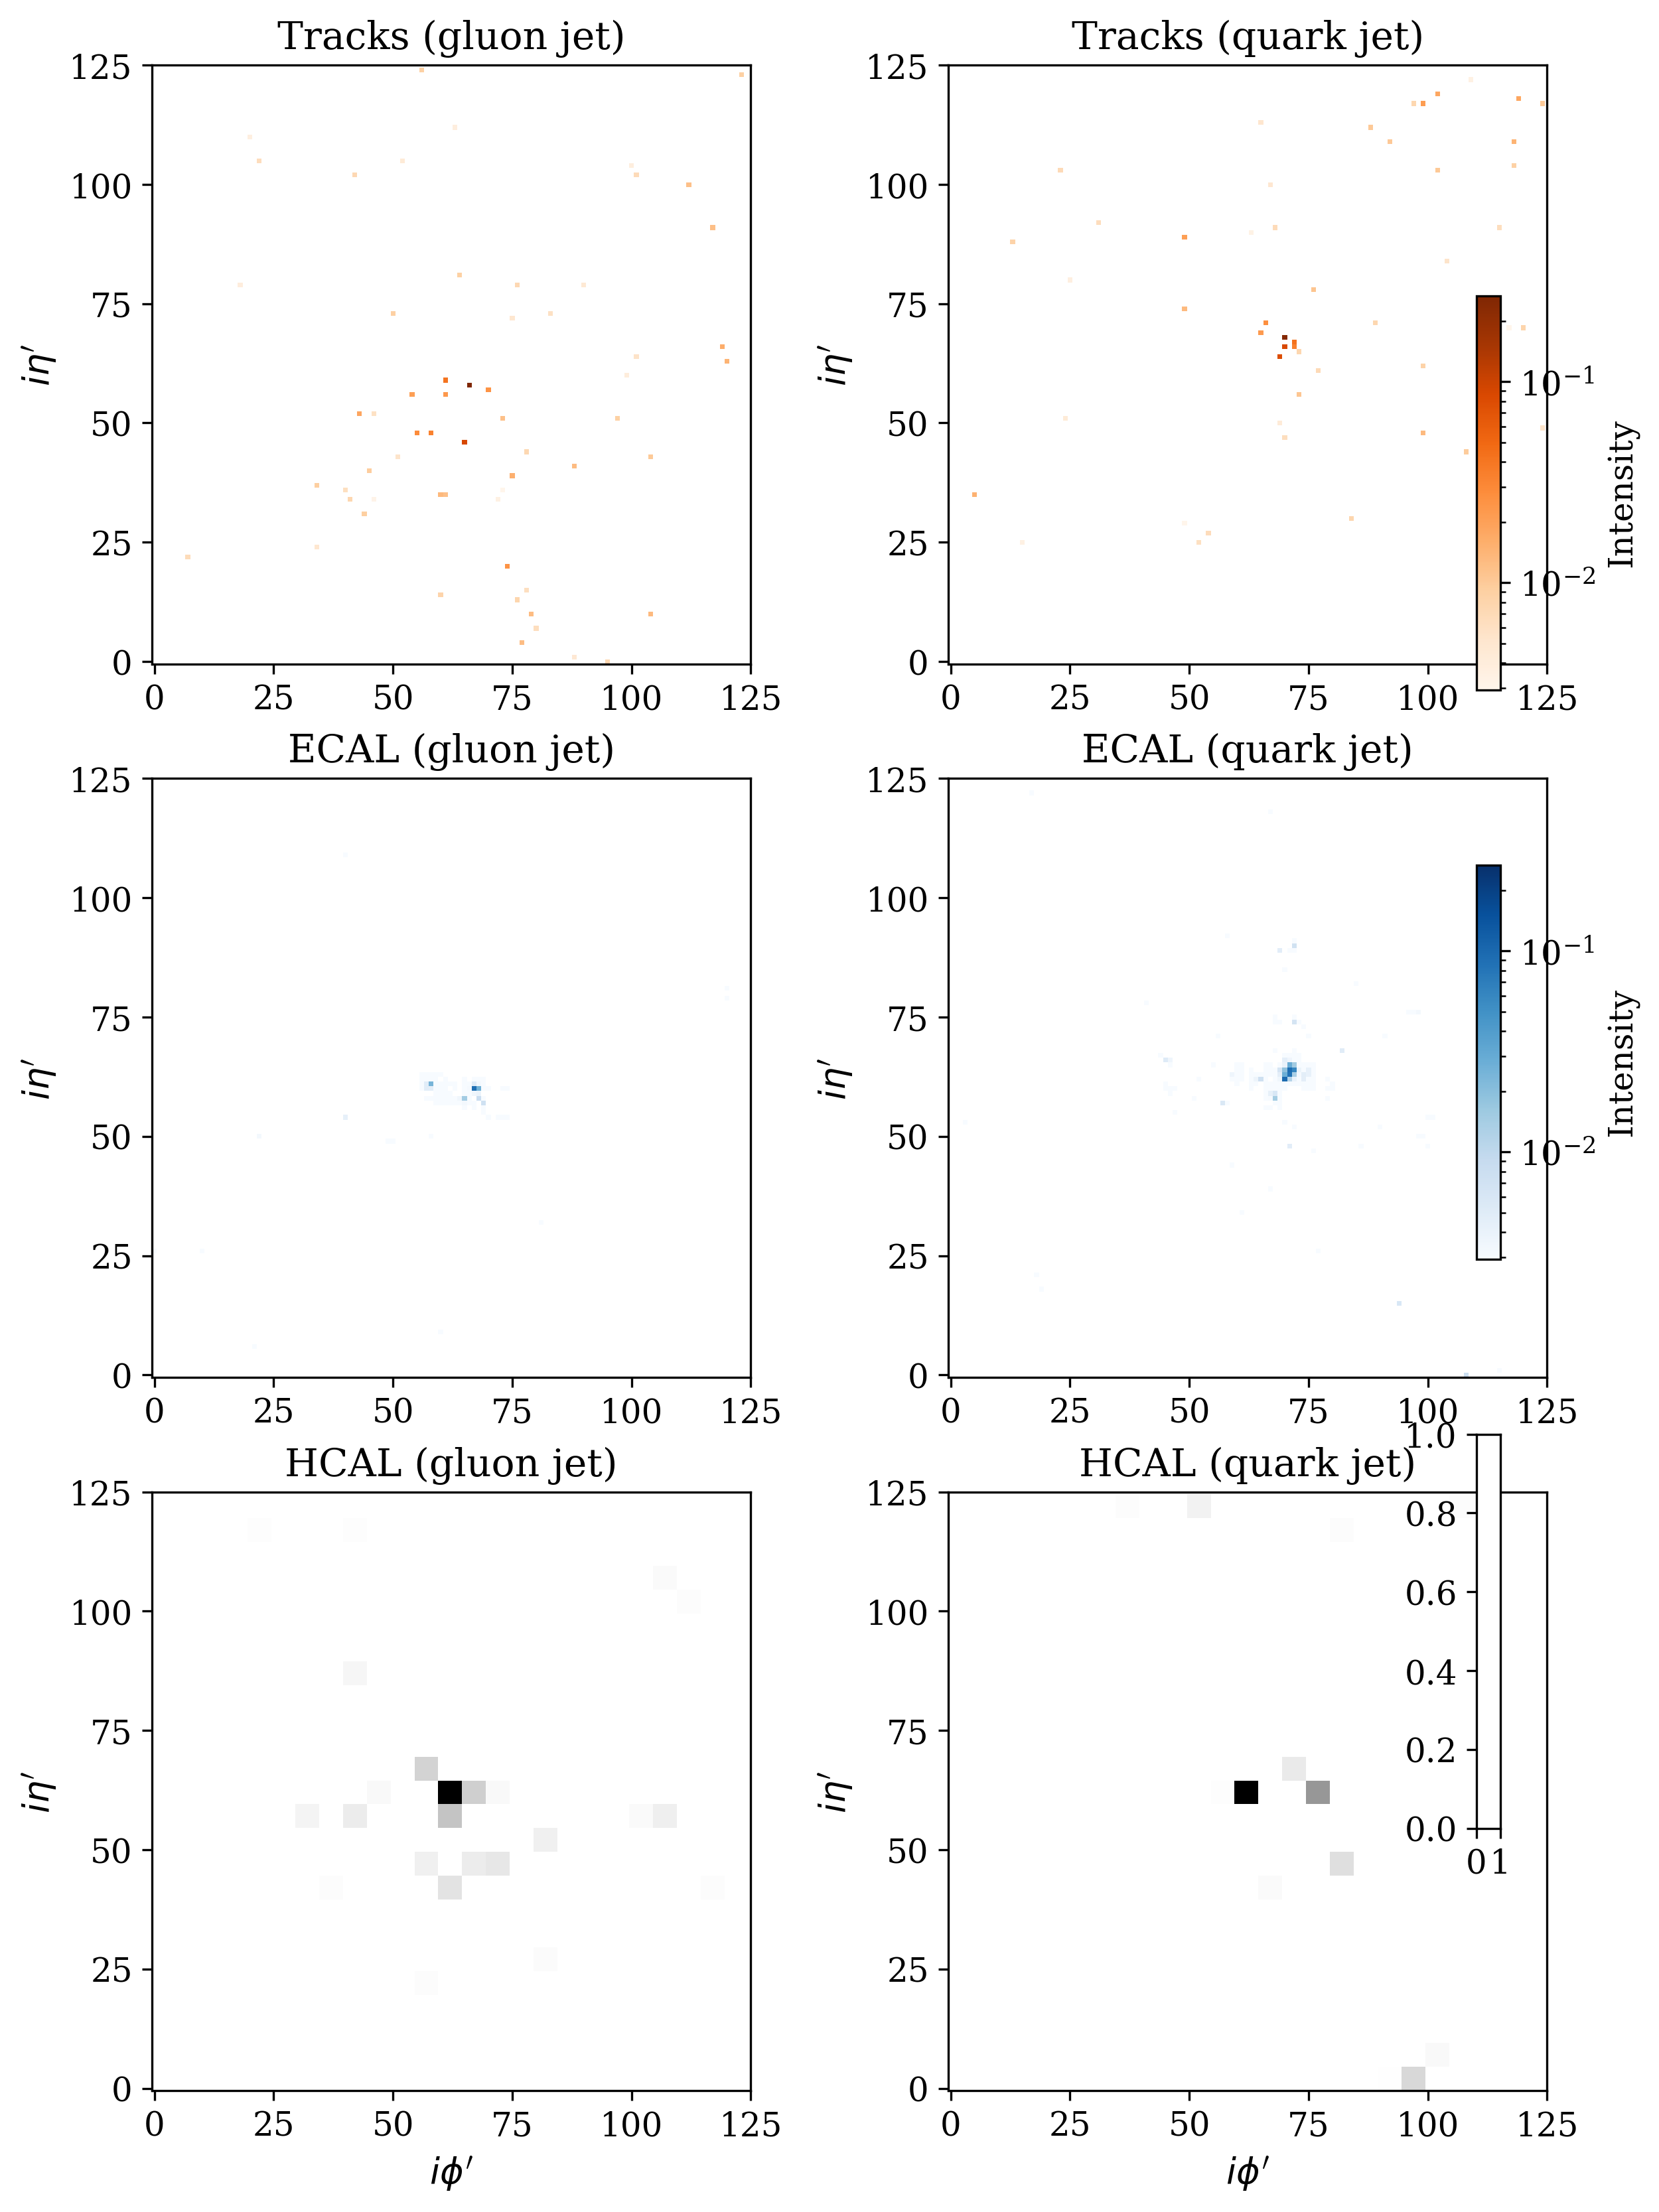

In [ ]:
n = 2

jets_gluon = x_red[:10][np.array(y_red[:10]) == 0]
jets_quark = x_red[:10][np.array(y_red[:10]) == 1]

# Define a LogNorm for logarithmic scaling
norm = mcolors.LogNorm()

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

# Titles for each subplot
titles_gluon = ["Tracks channel: gluon jet", "ECAL channel: gluon jet", "HCAL channel: gluon jet"]
titles_quark = ["Tracks channel: quark jet", "ECAL channel: quark jet", "HCAL channel: quark jet"]
cmaps = ["Oranges", "Blues", "Greys"]
norms = [norm, norm, None]


# Plot gluon images
for i in range(3):
    axs[i, 0].imshow(jets_gluon[n, :, :, i], cmap=cmaps[i], norm=norms[i])
    axs[i, 0].set_title(titles_gluon[i])
    axs[i, 0].set_xticks(np.arange(0, 126, 25))
    axs[i, 0].set_yticks(np.arange(0, 126, 25))

# Plot quark images
for i in range(3):
    axs[i, 1].imshow(jets_quark[n, :, :, i], cmap=cmaps[i], norm=norms[i])
    axs[i, 1].set_title(titles_quark[i])
    axs[i, 1].set_xticks(np.arange(0, 126, 25))
    axs[i, 1].set_yticks(np.arange(0, 126, 25))


for ax in axs.flat:
    ax.set(xlabel="i$\phi '$", ylabel="i$\eta '$")


# Improve layout
plt.tight_layout()
plt.show()

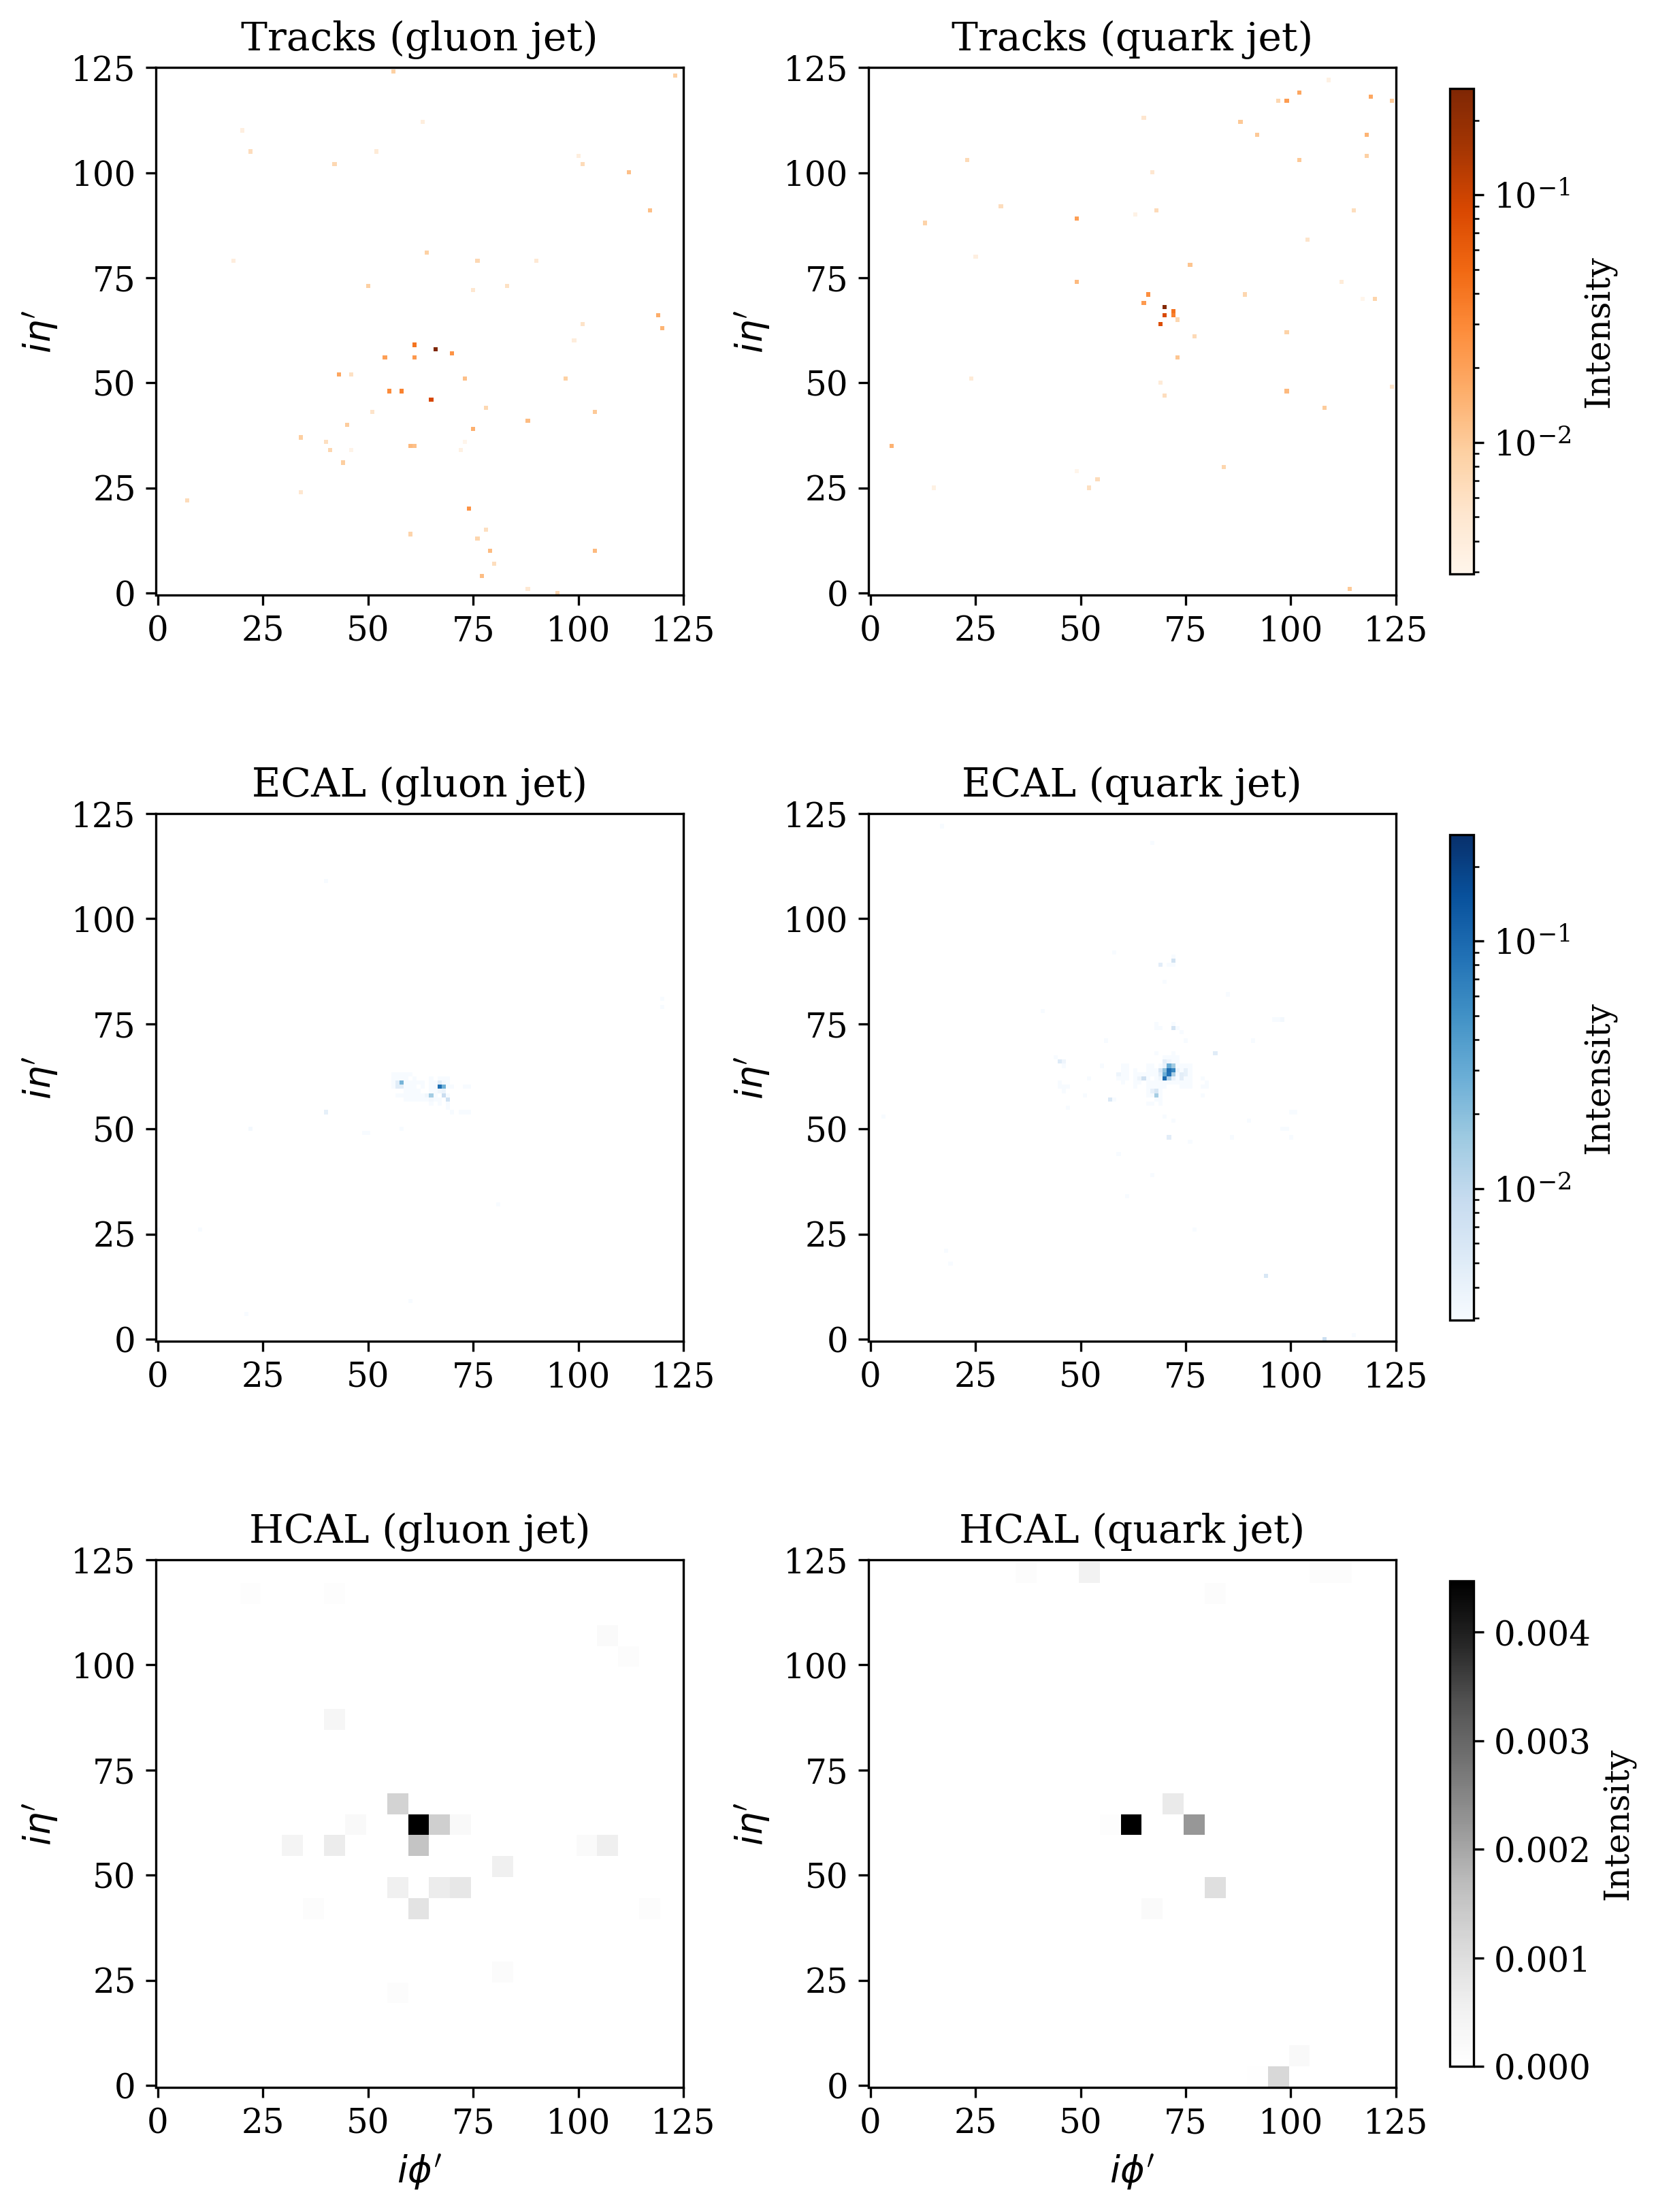

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl

# Set NeurIPS-style figure aesthetics
mpl.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 14,
    "axes.labelsize": 13,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "font.family": "serif",
    "figure.dpi": 300
})

n = 2  # jet index to plot

jets_gluon = x_red[:10][np.array(y_red[:10]) == 0]
jets_quark = x_red[:10][np.array(y_red[:10]) == 1]

# Define a LogNorm for logarithmic scaling
norm = mcolors.LogNorm()

fig, axs = plt.subplots(3, 2, figsize=(8, 11), constrained_layout=True)

titles_gluon = ["Tracks (gluon jet)", "ECAL (gluon jet)", "HCAL (gluon jet)"]
titles_quark = ["Tracks (quark jet)", "ECAL (quark jet)", "HCAL (quark jet)"]
cmaps = ["Oranges", "Blues", "Greys"]
norms = [norm, norm, None]

# Plot gluon images
for i in range(3):
    im = axs[i, 0].imshow(jets_gluon[n, :, :, i], cmap=cmaps[i], norm=norms[i], origin='lower')
    axs[i, 0].set_title(titles_gluon[i])
    axs[i, 0].set_xticks([0, 25, 50, 75, 100, 125])
    axs[i, 0].set_yticks([0, 25, 50, 75, 100, 125])
    if i == 2:
        axs[i, 0].set_xlabel(r"$i\phi'$")
    axs[i, 0].set_ylabel(r"$i\eta'$")

# Plot quark images
for i in range(3):
    im = axs[i, 1].imshow(jets_quark[n, :, :, i], cmap=cmaps[i], norm=norms[i], origin='lower')
    axs[i, 1].set_title(titles_quark[i])
    axs[i, 1].set_xticks([0, 25, 50, 75, 100, 125])
    axs[i, 1].set_yticks([0, 25, 50, 75, 100, 125])
    if i == 2:
        axs[i, 1].set_xlabel(r"$i\phi'$")
    axs[i, 1].set_ylabel(r"$i\eta'$")

    cbar = fig.colorbar(im, ax=axs[i, 1], fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel('Intensity', fontsize=12)

# Tight layout adjustment already via constrained_layout=True

# Save high-res PDF
plt.savefig('single_jet_intensity_per_channel.pdf', bbox_inches='tight', dpi=300)
plt.show()


## divide into dataset per channel

visualization of the main intensity per pixel for each channel.

/tmp/ipykernel_30/3304868431.py:57: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0.3, wspace=0.2)


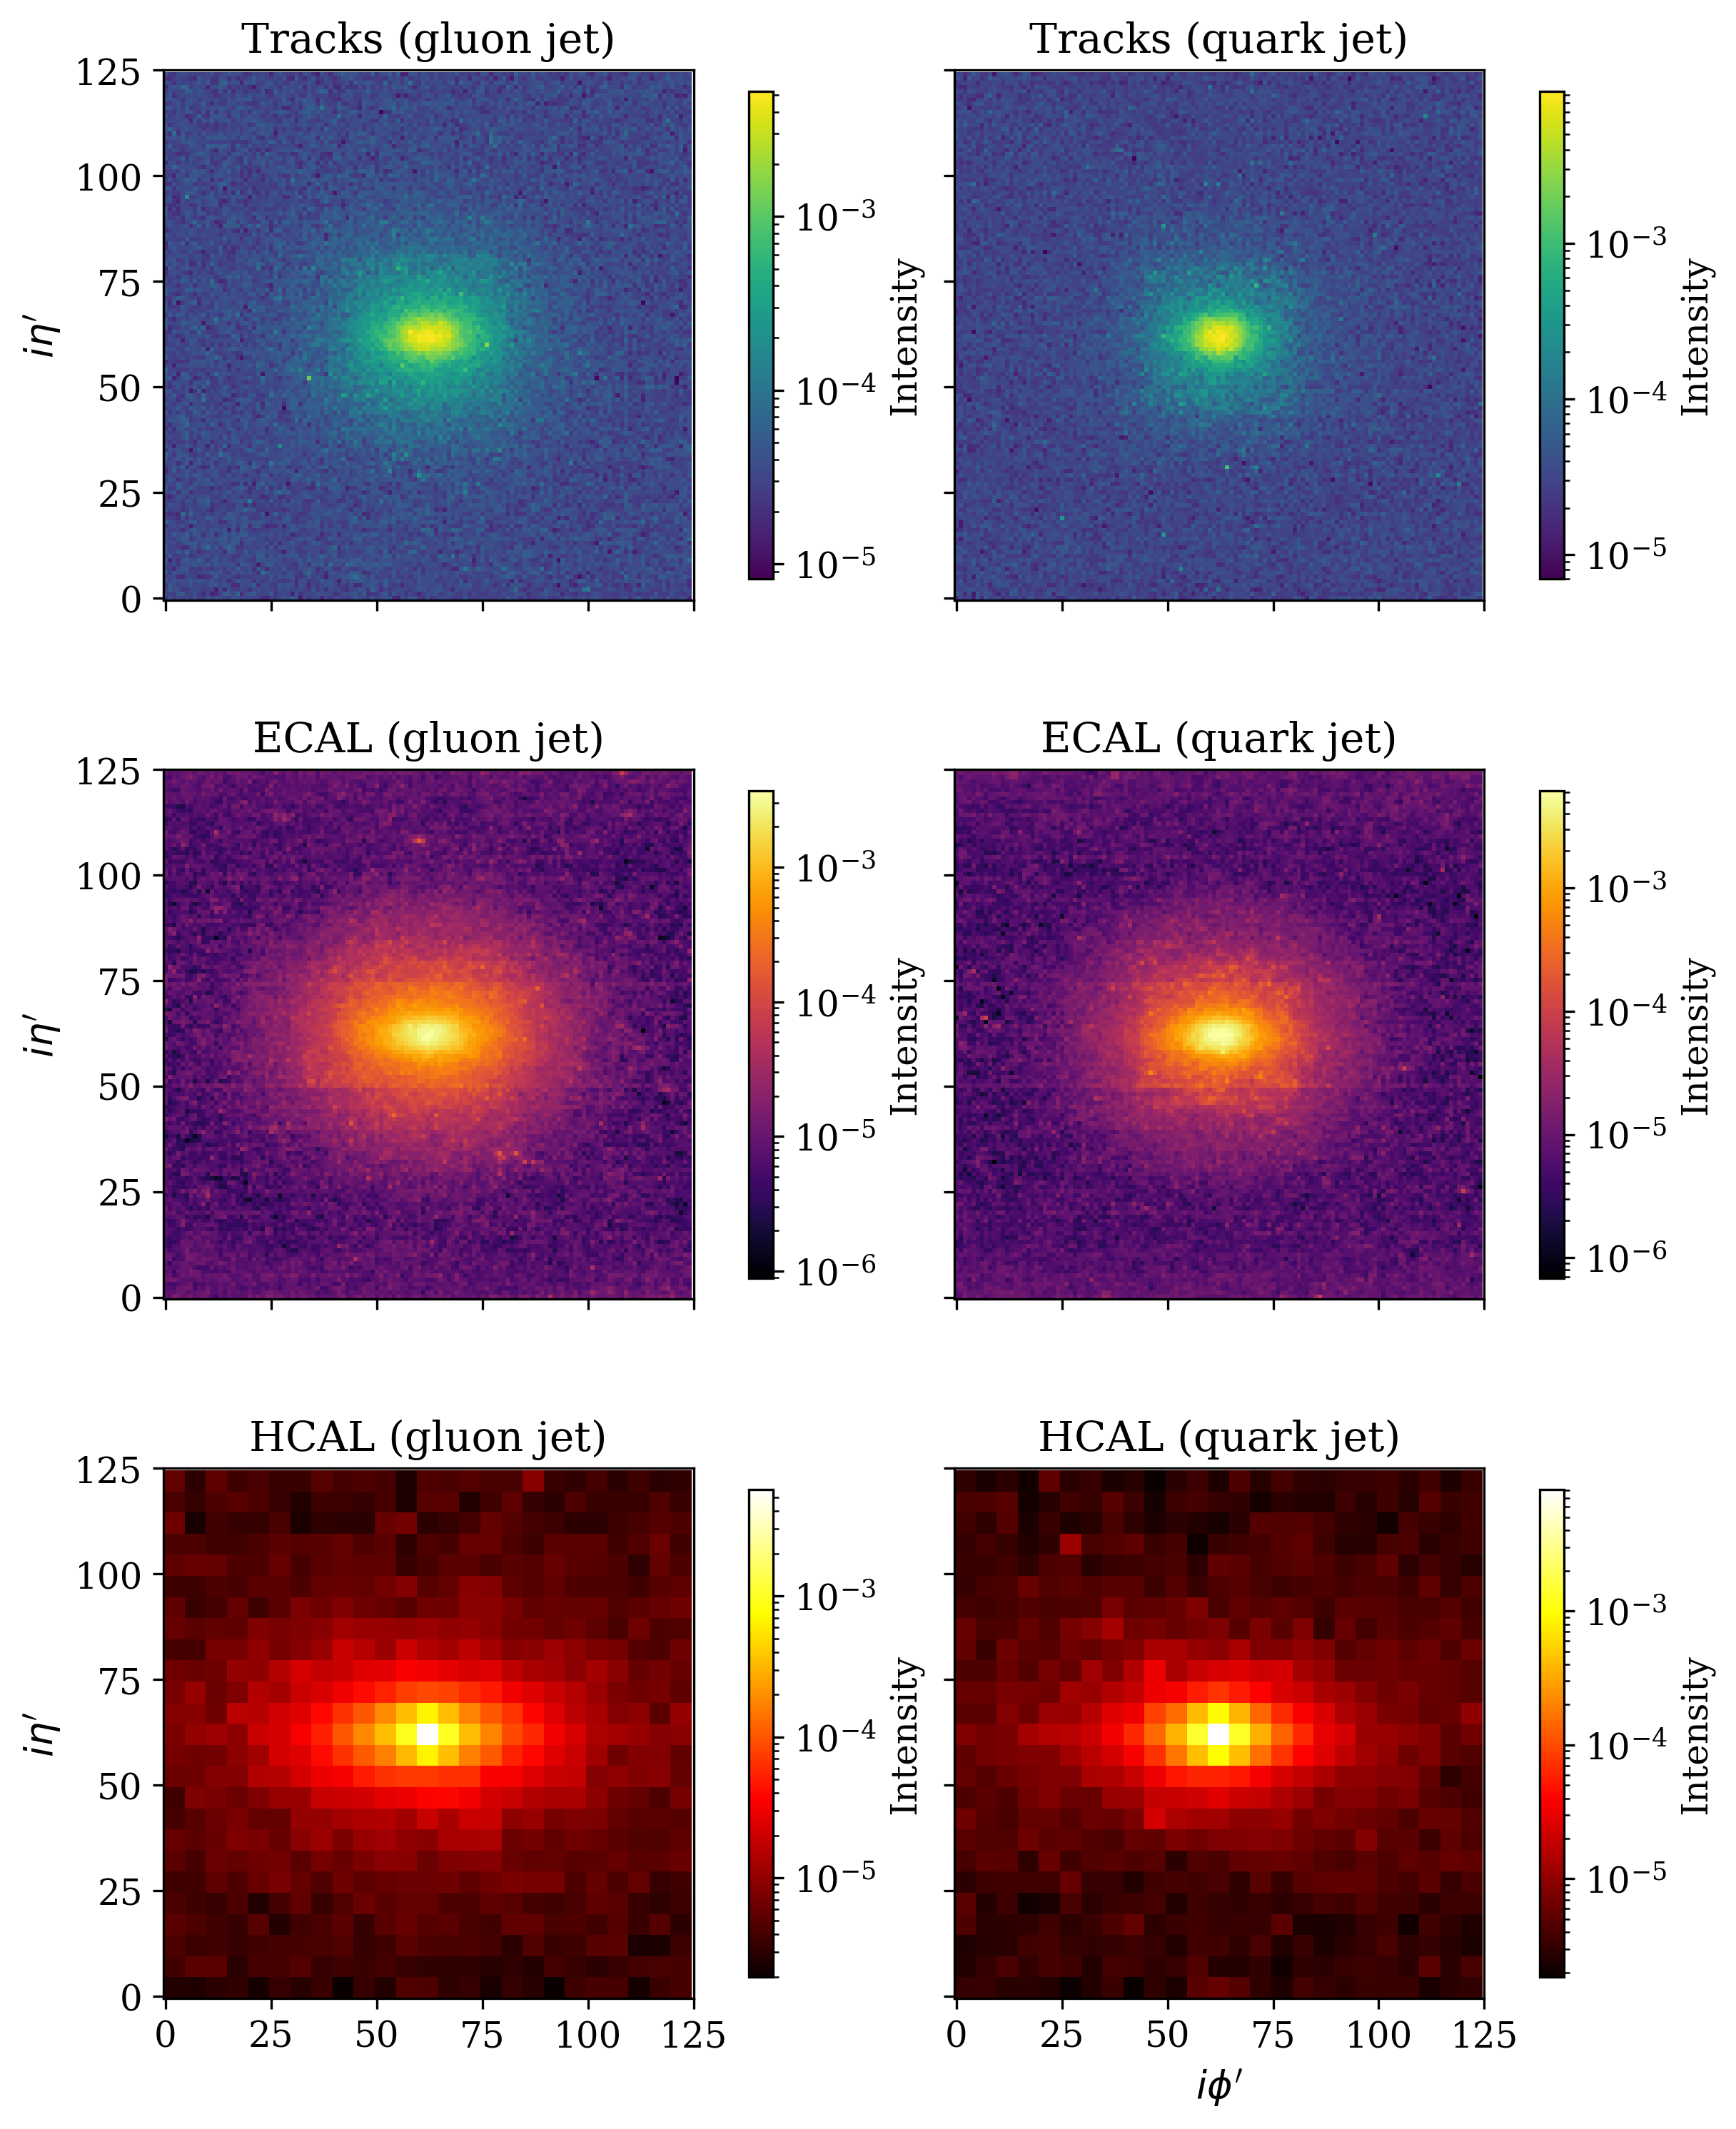

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib as mpl

# Set NeurIPS-style figure aesthetics
mpl.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 14,
    "axes.labelsize": 13,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "font.family": "serif",
    "figure.dpi": 300
})

n_sample = 10000

# Calculate the average for each class
gluon_avg = np.mean(x_red[:n_sample][y_red[:n_sample] == 0], axis=0)
quark_avg = np.mean(x_red[:n_sample][y_red[:n_sample] == 1], axis=0)

titles_gluon = ["Tracks (gluon jet)", "ECAL (gluon jet)", "HCAL (gluon jet)"]
titles_quark = ["Tracks (quark jet)", "ECAL (quark jet)", "HCAL (quark jet)"]
cmaps = ['viridis', "inferno", "hot"]

fig, axs = plt.subplots(3, 2, figsize=(8, 10), constrained_layout=True)

for i in range(3):
    im = axs[i, 0].imshow(gluon_avg[:, :, i], norm=LogNorm(), cmap=cmaps[i], origin='lower')
    axs[i, 0].set_title(titles_gluon[i])
    axs[i, 0].set_xticks([0, 25, 50, 75, 100, 125])
    axs[i, 0].set_yticks([0, 25, 50, 75, 100, 125])
    axs[i, 0].set_ylabel(r"$i\eta'$")

    cbar = fig.colorbar(im, ax=axs[i, 0], fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel('Intensity', fontsize=12)

for i in range(3):
    im = axs[i, 1].imshow(quark_avg[:, :, i], norm=LogNorm(), cmap=cmaps[i], origin='lower')
    axs[i, 1].set_title(titles_quark[i])
    axs[i, 1].set_xticks([0, 25, 50, 75, 100, 125])
    axs[i, 1].set_yticks([0, 25, 50, 75, 100, 125])

    if i == 2:
        axs[i, 1].set_xlabel(r"$i\phi'$")
    axs[i, 1].set_ylabel(r"$i\eta'$")

    cbar = fig.colorbar(im, ax=axs[i, 1], fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel('Intensity', fontsize=12)

# Hide x-axis labels for upper rows
for ax in axs.flat:
    ax.label_outer()

# Tight layout adjustment
fig.subplots_adjust(hspace=0.3, wspace=0.2)

# Save in high-quality PDF (vector-friendly)
plt.savefig('main_intensity_per_pixel_for_each_channel.pdf', bbox_inches='tight', dpi=300)

plt.show()
